Dataset:
    age  income
0   45   77000
1   34   65000
2   46   80000
3   25   50000
4   34   55000


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Assignments:
    age  income  Cluster
0   45   77000        0
1   34   65000        1
2   46   80000        0
3   25   50000        2
4   34   55000        1
5   40   75000        0
6   29   60000        1
7   35   85000        0
Cluster Centroids (Scaled):
 [[0.78571429 0.83571429]
 [0.34920635 0.28571429]
 [0.         0.        ]]


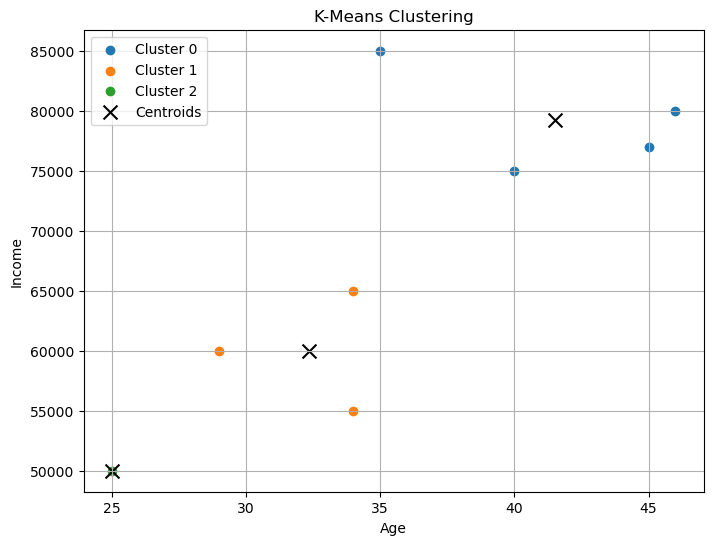

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Load the dataset from an Excel file
data = pd.read_excel('income.xlsx')
# Display the first few rows of the dataset
print("Dataset:\n", data.head())
# Extract features for clustering
features = data[['age', 'income']]  # Ensure these match your actual column names
# Preprocess data (Optional: Normalize the features for better performance)
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
# Apply K-Means Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)
# Display the cluster assignments
print("Cluster Assignments:\n", data[['age', 'income', 'Cluster']])
# Find and display the cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster Centroids (Scaled):\n", centroids)
# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['age'], cluster_data['income'], label=f'Cluster {cluster}')
# Plot centroids
centroids_unscaled = scaler.inverse_transform(centroids)
plt.scatter(centroids_unscaled[:, 0], centroids_unscaled[:, 1], 
            color='black', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.grid()
plt.show()